This notebook is designed to perform the calculations and functions to meet the AP-76 requirement for Downstream Sanitary Sewer Analysis documented at https://lawrenceks.org/mso/development/

Steps: 
using the AP76DsSSA Map, select the properties for the calculations
review or reassign land use characteristics as proposed

DEVELOPMENT LAND USE INPUT											
											
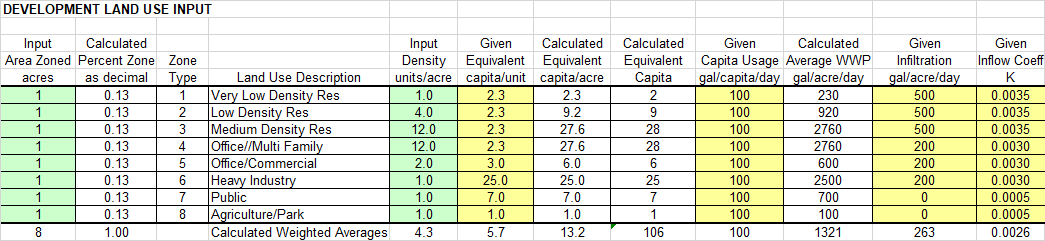

In [4]:
#Step 1 - select the properties using hte most recent "Land Use" GIS layer
ws = r"C:\Users\kgonterwitz\OneDrive - City of Lawrence KS\Documents\ArcGIS\Projects\AP76Calc.gdb"

arcpy.conversion.FeatureClassToFeatureClass("Landuse_Dec_2021", ws, "LU_12_2021", '', '#', '')

<Result 'C:\\Users\\kgonterwitz\\OneDrive - City of Lawrence KS\\Documents\\ArcGIS\\Projects\\AP76Calc.gdb\\LU_12_2021'>

In [5]:
#Check 1 - Test development area size if over 1 acre, then DSSA is needed
import pandas as pd
from arcgis.features import GeoAccessor, GeoSeriesAccessor



Land Use Description
1 Very Low Density Res
2 Low Density Res
3 Medium Density Res
4 Office//Multi Family
5 Office/Commercial
6 Heavy Industry
7 Public
8 Agriculture/Park


In [7]:
#calculate unit density where F living units are provided
#edit input generalization field to output the correct land use types for AP76

arcpy.management.Dissolve("LU_12_2021", ws+r'\LU_12_2021_D76', "Generalization", "SYSCALACRES SUM;OBJECTID_1 COUNT;Quickrefid UNIQUE;flivunits SUM", "MULTI_PART", "DISSOLVE_LINES")
arcpy.management.SelectLayerByAttribute("LU_12_2021_D76", "NEW_SELECTION", "SUM_flivunits > 0", None)
arcpy.management.CalculateField("LU_12_2021_D76", "InputDensityUnitsAcre", "!SUM_flivunits!/!SUM_SYSCALACRES!", "PYTHON3", '', "DOUBLE", "NO_ENFORCE_DOMAINS")

arcpy.management.CalculateField("LU_12_2021_D76", "DesignInputDensityUnitsAcre", "1", "PYTHON3", '', "DOUBLE", "NO_ENFORCE_DOMAINS")


<Result 'LU_12_2021_D76'>

In [8]:
sdf = pd.DataFrame.spatial.from_featureclass("LU_12_2021_D76")
sdf.head()

,OBJECTID,Generalization,SUM_SYSCALACRES,COUNT_OBJECTID_1,UNIQUE_Quickrefid,SUM_flivunits,InputDensityUnitsAcre,DesignInputDensityUnitsAcre,SHAPE


In [ ]:
sdf = pd.DataFrame.spatial.from_featureclass("LU_12_2021_DTotal")
sdf.head()
#sum syscal acres is total

In [11]:
arcpy.management.CalculateField("LU_12_2021_D76", "DesignInputDensityUnitsAcre", "1", "PYTHON3", '', "DOUBLE", "NO_ENFORCE_DOMAINS")
#edit design values

<Result 'LU_12_2021_D76'>

In [23]:
#assign equivalent capita per unit, usage, infiltration rate, and K
arcpy.management.SelectLayerByAttribute("LU_12_2021_D76", "NEW_SELECTION", "Generalization like '%Res%' Or Generalization Like '%Duplex%'", None)
arcpy.management.CalculateField("LU_12_2021_D76", "EquivalentCapitaUnit", "2.3", "PYTHON3", '', "DOUBLE", "NO_ENFORCE_DOMAINS")
arcpy.management.CalculateField("LU_12_2021_D76", "InfiltrationGAD", "500", "PYTHON3", '', "DOUBLE", "NO_ENFORCE_DOMAINS")
arcpy.management.CalculateField("LU_12_2021_D76", "K_Coeff", "0.0035", "PYTHON3", '', "DOUBLE", "NO_ENFORCE_DOMAINS")
arcpy.management.CalculateField("LU_12_2021_D76", "DesignInputDensityUnitsAcre", "4", "PYTHON3", '', "DOUBLE", "NO_ENFORCE_DOMAINS")

arcpy.management.SelectLayerByAttribute("LU_12_2021_D76", "NEW_SELECTION", "Generalization like '%Multi%'", None)
arcpy.management.CalculateField("LU_12_2021_D76", "EquivalentCapitaUnit", "2.3", "PYTHON3", '', "DOUBLE", "NO_ENFORCE_DOMAINS")
arcpy.management.CalculateField("LU_12_2021_D76", "InfiltrationGAD", "200", "PYTHON3", '', "DOUBLE", "NO_ENFORCE_DOMAINS")
arcpy.management.CalculateField("LU_12_2021_D76", "K_Coeff", "0.0030", "PYTHON3", '', "DOUBLE", "NO_ENFORCE_DOMAINS")
arcpy.management.CalculateField("LU_12_2021_D76", "DesignInputDensityUnitsAcre", "12", "PYTHON3", '', "DOUBLE", "NO_ENFORCE_DOMAINS")

arcpy.management.SelectLayerByAttribute("LU_12_2021_D76", "NEW_SELECTION", "Generalization LIKE '%Office%' And Generalization LIKE '%Comm%'", None)
arcpy.management.CalculateField("LU_12_2021_D76", "EquivalentCapitaUnit", "3", "PYTHON3", '', "TEXT", "NO_ENFORCE_DOMAINS")
arcpy.management.CalculateField("LU_12_2021_D76", "InfiltrationGAD", "200", "PYTHON3", '', "DOUBLE", "NO_ENFORCE_DOMAINS")
arcpy.management.CalculateField("LU_12_2021_D76", "K_Coeff", "0.0030", "PYTHON3", '', "DOUBLE", "NO_ENFORCE_DOMAINS")
arcpy.management.CalculateField("LU_12_2021_D76", "DesignInputDensityUnitsAcre", "2", "PYTHON3", '', "DOUBLE", "NO_ENFORCE_DOMAINS")

arcpy.management.SelectLayerByAttribute("LU_12_2021_D76", "NEW_SELECTION", "Generalization LIKE '%Industry%'", None)
arcpy.management.CalculateField("LU_12_2021_D76", "EquivalentCapitaUnit", "25", "PYTHON3", '', "TEXT", "NO_ENFORCE_DOMAINS")
arcpy.management.CalculateField("LU_12_2021_D76", "InfiltrationGAD", "200", "PYTHON3", '', "DOUBLE", "NO_ENFORCE_DOMAINS")
arcpy.management.CalculateField("LU_12_2021_D76", "K_Coeff", "0.0030", "PYTHON3", '', "DOUBLE", "NO_ENFORCE_DOMAINS")

arcpy.management.SelectLayerByAttribute("LU_12_2021_D76", "NEW_SELECTION", "Generalization LIKE '%Public%' OR Generalization LIKE '%Institutional%'", None)
arcpy.management.CalculateField("LU_12_2021_D76", "EquivalentCapitaUnit", "7", "PYTHON3", '', "TEXT", "NO_ENFORCE_DOMAINS")
arcpy.management.CalculateField("LU_12_2021_D76", "InfiltrationGAD", "0", "PYTHON3", '', "DOUBLE", "NO_ENFORCE_DOMAINS")
arcpy.management.CalculateField("LU_12_2021_D76", "K_Coeff", "0.0005", "PYTHON3", '', "DOUBLE", "NO_ENFORCE_DOMAINS")

arcpy.management.SelectLayerByAttribute("LU_12_2021_D76", "NEW_SELECTION", "Generalization LIKE '%Park%'", None)
arcpy.management.CalculateField("LU_12_2021_D76", "EquivalentCapitaUnit", "1", "PYTHON3", '', "TEXT", "NO_ENFORCE_DOMAINS")
arcpy.management.CalculateField("LU_12_2021_D76", "InfiltrationGAD", "0", "PYTHON3", '', "DOUBLE", "NO_ENFORCE_DOMAINS")
arcpy.management.CalculateField("LU_12_2021_D76", "K_Coeff", "0.0005", "PYTHON3", '', "DOUBLE", "NO_ENFORCE_DOMAINS")

arcpy.management.SelectLayerByAttribute("LU_12_2021_D76", "CLEAR_SELECTION", '', None)

<Result 'LU_12_2021_D76'>

In [24]:
#calculate EquivCapitaPerAcre, EquivCapita, pre-area weighted (_W) totals
arcpy.management.SelectLayerByAttribute("LU_12_2021_D76", "CLEAR_SELECTION", '', None)

arcpy.management.CalculateField("LU_12_2021_D76", "EquivCapitaPerAcre", "!DesignInputDensityUnitsAcre!*!EquivalentCapitaUnit!", "PYTHON3", '', "DOUBLE", "NO_ENFORCE_DOMAINS")
arcpy.management.CalculateField("LU_12_2021_D76", "EquivCapita", "!SUM_SYSCALACRES!*!EquivCapitaPerAcre!", "PYTHON3", '', "DOUBLE", "NO_ENFORCE_DOMAINS")
arcpy.management.CalculateField("LU_12_2021_D76", "AverageWWP", "100*!EquivCapitaPerAcre!", "PYTHON3", '', "DOUBLE", "NO_ENFORCE_DOMAINS")

arcpy.management.CalculateField("LU_12_2021_D76", "EquivCapita_W", "!SUM_SYSCALACRES!*!DesignInputDensityUnitsAcre!*!EquivalentCapitaUnit!", "PYTHON3", '', "DOUBLE", "NO_ENFORCE_DOMAINS")
arcpy.management.CalculateField("LU_12_2021_D76", "AverageWWP_W", "!SUM_SYSCALACRES!*!DesignInputDensityUnitsAcre!*!EquivalentCapitaUnit!*100", "PYTHON3", '', "DOUBLE", "NO_ENFORCE_DOMAINS")

arcpy.management.CalculateField("LU_12_2021_D76", "Infiltration_W", "!SUM_SYSCALACRES!*!InfiltrationGAD!", "PYTHON3", '', "DOUBLE", "NO_ENFORCE_DOMAINS")
arcpy.management.CalculateField("LU_12_2021_D76", "K_Coeff_W", "!SUM_SYSCALACRES!*!K_Coeff!", "PYTHON3", '', "DOUBLE", "NO_ENFORCE_DOMAINS")

<Result 'LU_12_2021_D76'>

Lawrence Design Data From 2003 Wastewater Master Plan			
			
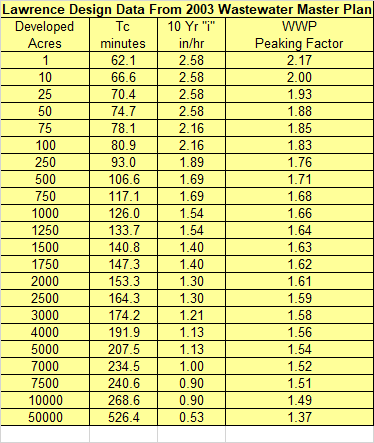

In [25]:
arcpy.management.Dissolve("LU_12_2021_D76", ws+r"\LU_12_2021_D76_D", None, "SUM_SYSCALACRES SUM;EquivCapita_W SUM;AverageWWP_W SUM;EquivCapita SUM;Infiltration_W SUM;K_Coeff_W SUM", "MULTI_PART", "DISSOLVE_LINES")


<Result 'C:\\Users\\kgonterwitz\\OneDrive - City of Lawrence KS\\Documents\\ArcGIS\\Projects\\AP76Calc.gdb\\LU_12_2021_D76_D'>

In [26]:
#an excel macro is used to interpolate, these are the equivalent interpolation functions

import numpy as np
import matplotlib.pyplot as plt

subdiv_acres = 7.03

x = [1, 10, 25, 50, 75, 100, 250, 500, 750, 1000, 1250, 1500, 1750, 2000, 2500, 3000, 4000, 5000, 7000, 7500, 10000, 50000]
y_TC = [62.1, 66.6, 70.4, 74.7, 78.1, 80.9, 93.0, 106.6, 117.1, 126.0, 133.7, 140.8, 147.3, 153.3, 164.3, 174.2, 191.9, 207.5, 234.5, 240.6, 268.6, 526.4]
y_10I = [2.58, 2.58, 2.58, 2.58, 2.16, 2.16, 1.89, 1.69, 1.69, 1.54, 1.54, 1.40, 1.40, 1.30, 1.30, 1.21, 1.13, 1.13, 1.00, 0.90, 0.90, 0.53]
y_wwp = [2.17, 2.00, 1.93, 1.88, 1.85, 1.83, 1.76, 1.71, 1.68, 1.66, 1.64, 1.63, 1.62, 1.61, 1.59, 1.58, 1.56, 1.54, 1.52, 1.51, 1.49, 1.37]



y_tc_int = np.interp(subdiv_acres, x, y_TC)
y_10_int = np.interp(subdiv_acres, x, y_10I)
y_wwp_int = np.interp(subdiv_acres, x, y_wwp)

print(y_tc_int)
print(y_10_int)
print(y_wwp_int)




65.115
2.58
2.0561


In [27]:
arcpy.management.CalculateField("LU_12_2021_D76_D", "TC_Minutes", y_tc_int, "PYTHON3", '', "DOUBLE", "NO_ENFORCE_DOMAINS")
arcpy.management.CalculateField("LU_12_2021_D76_D", "TenYearInHr", y_10_int, "PYTHON3", '', "DOUBLE", "NO_ENFORCE_DOMAINS")
arcpy.management.CalculateField("LU_12_2021_D76_D", "WWP_PeakFactor", y_wwp_int, "PYTHON3", '', "DOUBLE", "NO_ENFORCE_DOMAINS")


<Result 'LU_12_2021_D76_D'>

In [38]:
#Design Flow Calculations
arcpy.management.CalculateField("LU_12_2021_D76_D", "Inflow_CFS", "!SUM_K_Coeff_W!*!TenYearInHr!", "PYTHON3", '', "DOUBLE", "NO_ENFORCE_DOMAINS")
arcpy.management.CalculateField("LU_12_2021_D76_D", "PeakWWP", "!SUM_AverageWWP_W!*!WWP_PeakFactor!/646316.9", "PYTHON3", '', "DOUBLE", "NO_ENFORCE_DOMAINS")
arcpy.management.CalculateField("LU_12_2021_D76_D", "Infiltration", "!SUM_Infiltration_W!/646316.9", "PYTHON3", '', "DOUBLE", "NO_ENFORCE_DOMAINS")
arcpy.management.CalculateField("LU_12_2021_D76_D", "SumInflowPeakWWPInfiltration", "!Inflow_CFS!+!PeakWWP!+!Infiltration!", "PYTHON3", '', "DOUBLE", "NO_ENFORCE_DOMAINS")
arcpy.management.CalculateField("LU_12_2021_D76_D", "DesignFlowMGD", "!SumInflowPeakWWPInfiltration!*0.6463169", "PYTHON3", '', "DOUBLE", "NO_ENFORCE_DOMAINS")
arcpy.management.CalculateField("LU_12_2021_D76_D", "ADF_MGD", "!SUM_AverageWWP_W!/1000000", "PYTHON3", '', "DOUBLE", "NO_ENFORCE_DOMAINS")
arcpy.management.CalculateField("LU_12_2021_D76_D", "DesignFlowADFPeak", "!DesignFlowMGD!/!ADF_MGD!", "PYTHON3", '', "DOUBLE", "NO_ENFORCE_DOMAINS")
arcpy.management.CalculateField("LU_12_2021_D76_D", "DesignFlowGPM", "!DesignFlowMGD!*1000000/24/60", "PYTHON3", '', "DOUBLE", "NO_ENFORCE_DOMAINS")



<Result 'LU_12_2021_D76_D'>

The downstream characteristic of the system will also be investigated by a
licensed engineer, according to KDHE criteria and any deficiencies in the
downstream system will be noted. The investigation will be required for the
gravity systems as well as for lift stations and their accompanying force mains.
The investigation will be made on the downstream system until the proposed
design flow is equal to or less than ten percent (10%) of the existing design flow.
 Results of this investigation will be provided to the City Engineer. 

In [6]:
#select the downstream sewer lines from "Sewer Flow Capacity" Layer
#copy to project db
ws = r"C:\Users\kgonterwitz\OneDrive - City of Lawrence KS\Documents\ArcGIS\Projects\AP76Calc.gdb"

#arcpy.conversion.FeatureClassToFeatureClass("Sewer Flow Capacity", ws, "SewerFlowCap042722", '', "#", '')

DesignFlow = 29  #gpm

DesignFlowMGD = DesignFlow*1440/1000000

arcpy.management.CalculateField("DSSSA_LangstonCommons", "DesignFlowAdd", DesignFlow, "PYTHON3", '', "DOUBLE", "NO_ENFORCE_DOMAINS")

arcpy.management.CalculateField("DSSSA_LangstonCommons", "DesignFlowMGD", DesignFlowMGD, "PYTHON3", '', "DOUBLE", "NO_ENFORCE_DOMAINS")

arcpy.management.CalculateField("DSSSA_LangstonCommons", "DesignFlowNew", "!CAP_DGN!+!DesignFlowMGD!", "PYTHON3", '', "DOUBLE", "NO_ENFORCE_DOMAINS")

arcpy.management.CalculateField("DSSSA_LangstonCommons", "PercentFlowIncrease", "round(!DesignFlowNew!/!CAP_DGN!-1, 3)*100", "PYTHON3", '', "TEXT", "NO_ENFORCE_DOMAINS")



<Result 'DSSSA_LangstonCommons'>

In [40]:
DesignFlow = 31  #gpm

DesignFlowMGD = DesignFlow*1440/1000000

print(DesignFlowMGD)

0.04464
